Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_B_interval__, p_A_interval__]
100%|██████████| 5500/5500 [00:04<00:00, 1342.98it/s]
The acceptance probability does not match the target. It is 0.882690496062, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c183eef28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c184e3588>]], dtype=object)

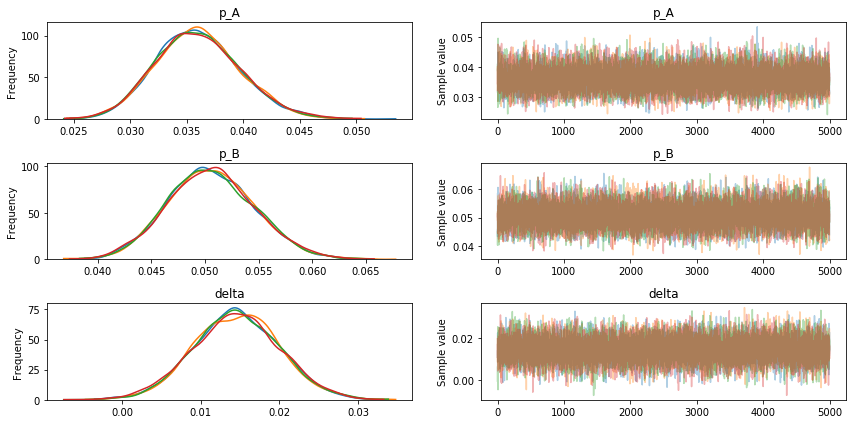

In [4]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
pA_true = 0.04
pB_true = 0.05
N_A = 2500
N_B = 3000
obs_A = np.random.binomial(1, pA_true, size=N_A)
obs_B = np.random.binomial(1, pB_true, size=N_B)
with pm.Model() as ab_model:
    #priors
    p_A = pm.Uniform('p_A', 0, 1)
    p_B = pm.Uniform('p_B', 0, 1)
    #likelihoods
    obs_A = pm.Bernoulli('obs_A', p_A, observed=obs_A)
    osb_B = pm.Bernoulli('obs_B', p_B, observed=obs_B)
    #find distribution of difference
    delta = pm.Deterministic('delta',p_B - p_A)
    trace = pm.sample(5000)
pm.traceplot(trace)

In [11]:
%matplotlib inline
import pymc3 as pm
import seaborn as sb
from theano import config
config.warn.round = False

n = 1000
obs_v1 = 275
obs_v2 = 325

with pm.Model() as model:
    # defining the priors now
    prior_v1 = pm.Beta('prior_v1', alpha = 2, beta = 2)
    prior_v2 = pm.Beta('prior_v2', alpha = 2, beta = 2)
    # defining the likelihood now
    like_v1 = pm.Binomial('like_v1', n=n, p=prior_v1, observed=obs_v1)
    like_v2 = pm.Binomial('like_v2', n=n, p=prior_v2, observed=obs_v2)    
    # define metrics
    pm.Deterministic('difference', prior_v2 - prior_v1)
    pm.Deterministic('relation', (prior_v2/prior_v1) - 1)    
    
    # inference
    trace = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)
    

logp = -173.91, ||grad|| = 285.04: 100%|██████████| 7/7 [00:00<00:00, 2327.21it/s]
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [prior_v2_logodds__]
>Metropolis: [prior_v1_logodds__]
100%|██████████| 50500/50500 [00:10<00:00, 5034.80it/s]
The number of effective samples is smaller than 25% for some parameters.


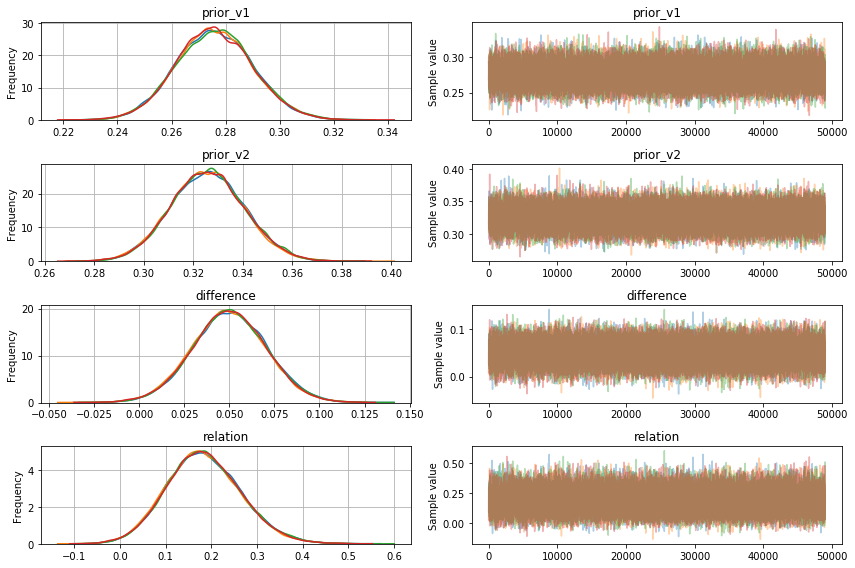

In [12]:
_ = pm.traceplot(trace[1000:], grid=True)

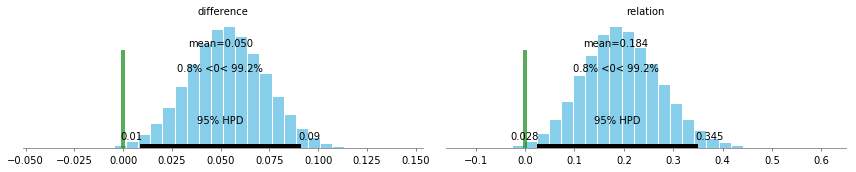

In [13]:
_ = pm.plot_posterior(trace[1000:], varnames=['difference', 'relation'], 
                      ref_val=0, color='#87ceeb')

In [16]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import math

def calc_ab(alpha_a, beta_a, alpha_b, beta_b):
    '''
    See http://www.evanmiller.org/bayesian-ab-testing.html
    αA is one plus the number of successes for A
    βA is one plus the number of failures for A
    αB is one plus the number of successes for B
    βB is one plus the number of failures for B
    '''
    total = 0.0
    for i in range(alpha_b):
        num = math.lgamma(alpha_a+i) + math.lgamma(beta_a+beta_b) + math.lgamma(1+i+beta_b) + math.lgamma(alpha_a+beta_a)
        den = math.log(beta_b+i) + math.lgamma(alpha_a+i+beta_a+beta_b) + math.lgamma(1+i) + math.lgamma(beta_b) + math.lgamma(alpha_a) + math.lgamma(beta_a)

        total += math.exp(num - den)
    return total

print(calc_ab(275,725,325,675))

0.9927035836382551


In [17]:
# AB Testing using Evan Miller's formulae


import math

def calculate_probability(succ_v1, fail_v1, succ_v2, fail_v2):
    
    total = 0.0
    for i in range(succ_v2):
        
        numerator = math.lgamma(succ_v1+i) + math.lgamma(fail_v1+fail_v2) + math.lgamma(1+i+fail_v2) + math.lgamma(succ_v1+fail_v1)
        denominator = math.log(fail_v2+i) + math.lgamma(succ_v1+i+fail_v1+fail_v2) + math.lgamma(1+i) + math.lgamma(fail_v2) + math.lgamma(succ_v1) + math.lgamma(fail_v1)
        
        total += math.exp(numerator - denominator)
        return total
    
    
print (calculate_probability(275,725,325,675))    
        

3.7886897552576564e-70
